In [1]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Testing adaline for simple liniar sepration

given a value from R^2, (x, y), is y > 1 ?

In [151]:
train_data = np.random.uniform(-100, 100, (1000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,44.0161,73.8235,True
1,5.15163,-66.769,False
2,4.94993,-87.5093,False
3,-17.2992,26.1145,True
4,68.7581,30.7863,True
...,...,...,...
995,54.2678,-33.3022,False
996,-57.8821,-41.1703,False
997,-89.0445,22.1781,True
998,63.3361,85.3552,True


In [152]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-5.16939384, 39.1736551 ])

In [153]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.97

In [154]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.966

In [155]:
# preforms just as well on new data, perhaps a tiny bit worse

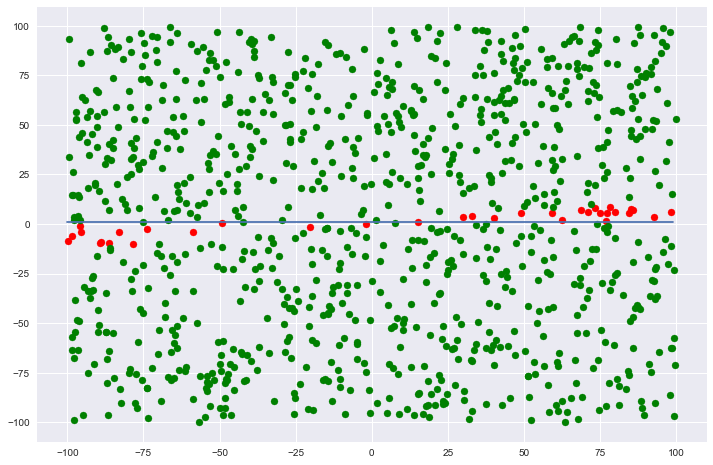

In [156]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [157]:
# the angle/slope is a bit off

In [158]:
#does more data help?

train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before
train_label = train_data[:,1] > 1

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.987

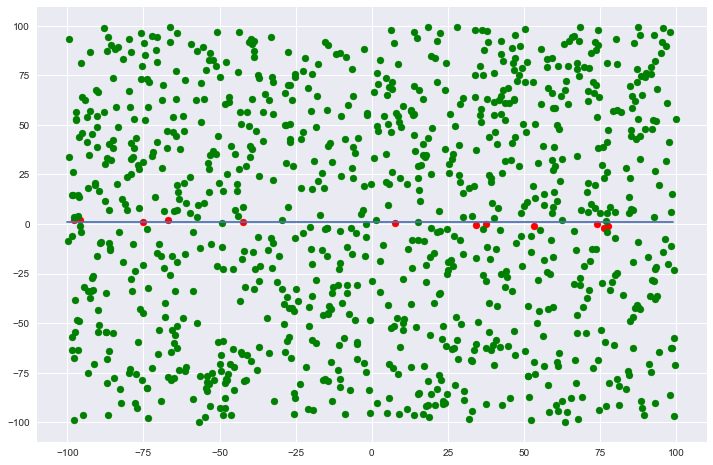

In [159]:
#seems like it

mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

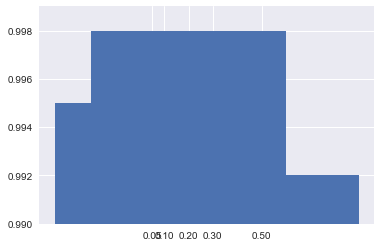

In [12]:
#what about different learning rates

scores = []

rates = [0.05, 0.1, 0.2, 0.3, 0.5]

for rate in rates:

    neuron = adaline(2, rate)

    history = neuron.train(train_data, train_label)

    pred = np.array([neuron.predict(i) for i in test_data])
    pred = pred >= 0.5

    scores.append(metrics.accuracy_score(test_label, pred))


plt.bar(rates, scores)
plt.xticks(rates)
plt.ylim([0.99,0.999])
plt.show()

In [160]:
#looks like somewhere in the middle is more relable

## Testing adaline for a more challenging task

given a value from R^2, (x, y).
does it setesfy: 4 <= x^2 + y^2 <= 9 ?

this equation describe a ring with raduises 2 and 3

In [206]:
# we'll have to decrease the posiable range of values to balance the data-set

train_data = np.random.uniform(-6, 6, (1000, 2))

small_circle = 4 <= train_data[:,0]**2 + train_data[:,1]**2
big_circle = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = small_circle & big_circle

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,5.89476,5.12556,False
1,5.94433,2.62582,False
2,1.08262,-2.08769,True
3,-0.447191,-4.46552,False
4,2.10516,1.73183,True
...,...,...,...
995,3.02918,0.895775,False
996,5.90056,-2.41283,False
997,2.73845,-5.84447,False
998,3.46355,1.15689,False


In [207]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-0.92201459, -0.82195444])

In [208]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.456

In [209]:
# preforms poorly but is to be excpected since
# 1-neuron model can only learn linarly seprable
# classification problomes
# in fact its predictions are in part with simply geussing (around 0.5 correct predictions)


In [210]:
train_data = np.random.uniform(-6, 6, (30000, 2)) # 30 times as many dots as before

circle_small = 4 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = circle_small & circle_big

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5

metrics.accuracy_score(train_label, pred)

0.49696666666666667

In [211]:
test_data =  np.random.uniform(-6, 6, (1000, 2))

circle_small = 4 <= test_data[:,0]**2 + test_data[:,1]**2
circle_big = test_data[:,0]**2 + test_data[:,1]**2 <= 9

test_label = circle_small & circle_big

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.474

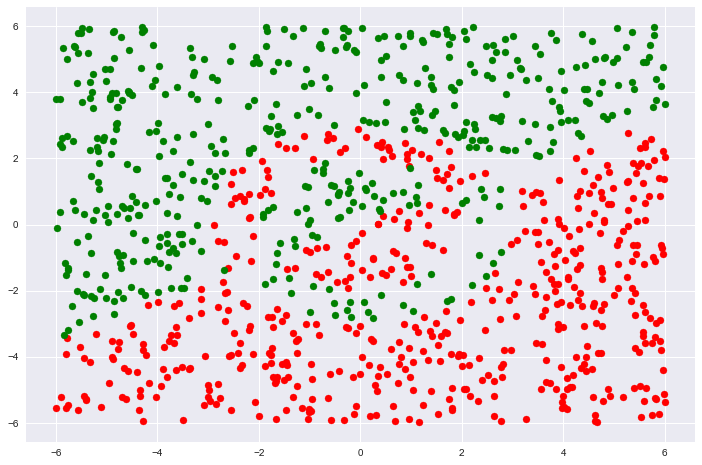

In [212]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.show()

In [213]:
# we can see very clearly that the adaline tried to find a LINIAR inequalty
# to classefy the instances by which

### MultyLevelPreceptron - MLP
we'll now try a more powerfull model for this problome
a very simple form of a NerualNetwork

In [214]:
from sklearn.neural_network import MLPClassifier

In [215]:
# we'll use 2 hidden layers, out of the thought that there are 2 circles
# the net needs 'to understand'.
# the 2nd layer has 4 neurons because a ring is 4 dimentional
# meaning: it is defined  by 4 pharameters

# we use tanh as the activatin function because its very similar to
# sigmoid wich we are already familiar with in this project 

mlp = MLPClassifier(max_iter = 500, activation = 'tanh', hidden_layer_sizes = (6,4))

mlp.fit(train_data, train_label)

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4), max_iter=500)

In [216]:
pred = mlp.predict(test_data)

metrics.accuracy_score(test_label, pred)

0.998

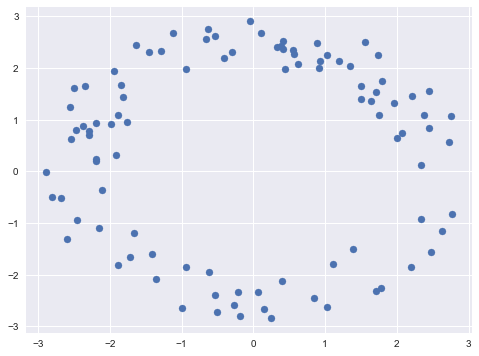

In [219]:
# almost no mistakes, lets view the dots it classefied correctly

success = test_data[np.where(pred == True)]

plt.figure(figsize = (8, 6))
plt.scatter(success[:, 0], success[:, 1])
plt.show()

In [220]:
# looks about right, next we'll attempt to plot the predictions each
# neuron in the net woud make if it would be the final stop
# it's view point of the data so to speak

In [453]:
# so the following code will generate the value each neuron
# holds after a prediction-forwarding

indevidual_predictions = []

for dot in test_data:

    preds = [list(dot)]

    for i, layer in enumerate(mlp.coefs_):

        preds.append([])

        for j in range(len(layer[0])):

            preds[i+1].append(np.tanh(np.array(preds[i]).dot(layer[:,j])))

    indevidual_predictions.append(preds)
    
indevidual_predictions = np.array(indevidual_predictions)
        

In [454]:
layer1 = indevidual_predictions[:,1]
layer1 = indevidual_predictions[:,2]
output_layer = indevidual_predictions[:,3]

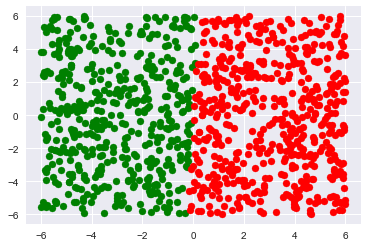

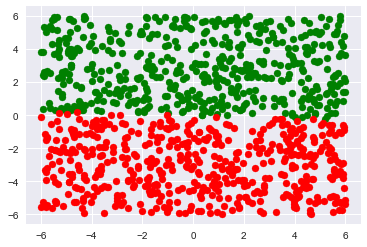

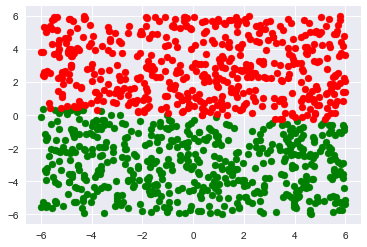

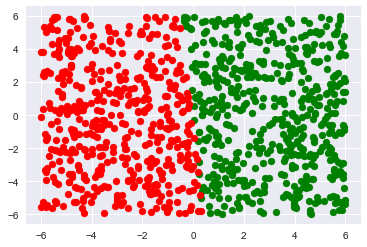

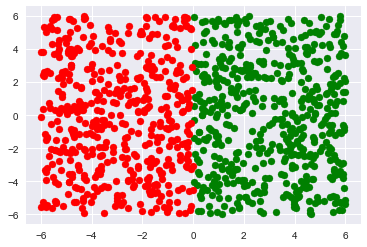

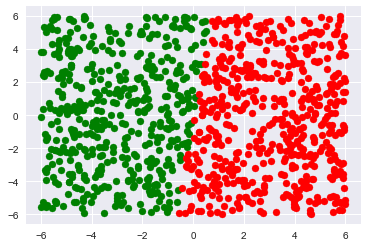

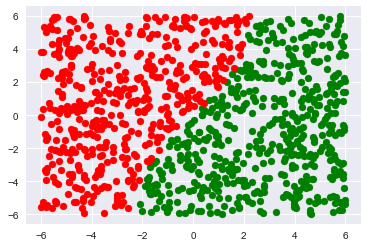

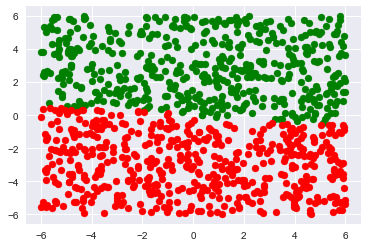

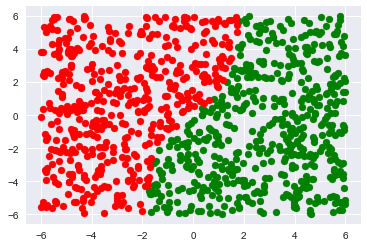

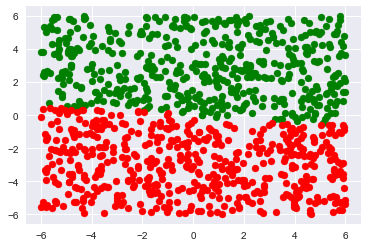

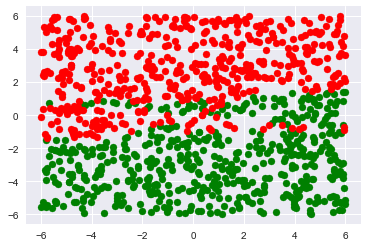

In [476]:
for i in range(1, len(mlp.coefs_) +1):

    layer = indevidual_predictions[:,i]

    for j in range(len(mlp.coefs_[i-1][0])):

        n = np.array([example[j] for example in layer])
        yes = n >= 0
        no =  n < 0

        plt.scatter(test_data[yes][:,0], test_data[yes][:,1], color = 'g')
        plt.scatter(test_data[no][:,0], test_data[no][:,1], color = 'r')
        plt.show()